<a href="https://colab.research.google.com/github/mehdihatami1998/DynamicsOfStructures/blob/main/L06_Using_Duhamel_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Duhamel Integral

## Problem Data

In [ ]:
M = 600000
T = 0.6
z = 0.10
p0 = 400000
t0, t1, t2, t3 = 0.0, 1.0, 3.0, 6.0

## Natural Frequency, Damped Frequency

In [ ]:
wn = 2*np.pi/T
wd = wn*np.sqrt(1-z**2)

## Computation

### Preliminaries

We chose a time step and we compute a number of constants of the integration procedure that depend on the time step

In [ ]:
dt = 0.05
edt = np.exp(-z*wn*dt)
fac = dt/(2*M*wd)

We initialize a time variable

In [ ]:
N = int(t3/dt)+1
t = dt*np.arange(N)

We compute the load, the sines and the cosines of $\omega_D t$ and their products

In [ ]:
p = np.where(t<=t1, p0*(t-t0)/(t1-t0), np.where(t<t2, p0*(1-(t-t1)/(t2-t1)), 0))

s, c = np.sin(wd*t), np.cos(wd*t)
sp, cp = s*p, c*p

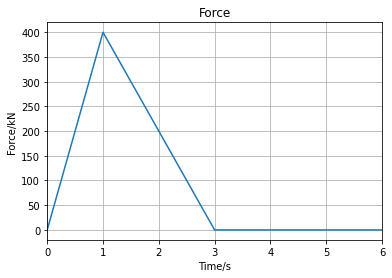

In [ ]:
plt.plot(t, p/1000)
plt.xlabel('Time/s')
plt.ylabel('Force/kN')
plt.xlim((t0,t3))
plt.title('Force') ; plt.grid();

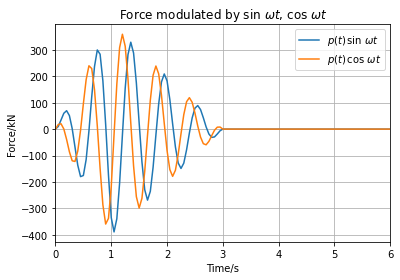

In [ ]:
plt.plot(t, sp/1000, label=r'$p(t)\,\sin\,\omega t$')
plt.plot(t, cp/1000, label=r'$p(t)\,\cos\,\omega t$')
plt.xlabel('Time/s')
plt.ylabel('Force/kN')
plt.xlim((t0,t3))
plt.title(r'Force modulated by $\sin\,\omega t$, $\cos\,\omega t$')
plt.legend()
plt.grid();

The main (and only) loop in our code, we initialize `A`, `B` and a container for saving the deflections `x`,
then we compute the next values of `A` and `B`, the next value of `x` is eventually appended to the container.

In [ ]:
A, B, x = 0, 0, [0]

for i in range(1, N):
    A = A*edt+fac*(cp[i-1]*edt+cp[i])
    B = B*edt+fac*(sp[i-1]*edt+sp[i])
    x.append(A*s[i]-B*c[i])

It is necessary to plot the response.

In [ ]:
x = np.array(x)
k = M*wn**2
Dst = p/k

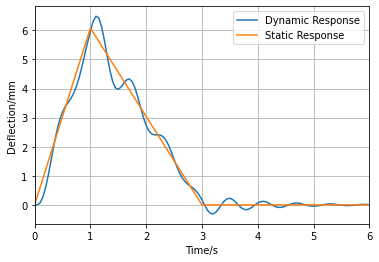

In [ ]:
plt.plot(t, x*1000, label='Dynamic Response')
plt.plot(t, Dst*1000, label='Static Response')
plt.xlabel('Time/s')
plt.ylabel('Deflection/mm')
plt.xlim((t0,t3))
plt.grid()
plt.legend()
plt.show();